In [ ]:
import os
import zipfile
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Merging labels to the image and impressions

In [ ]:
data_path = "/content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data"
print(os.listdir(data_path))

['archive.zip', 'metadata.csv', 'val', 'train', 'test']


In [ ]:
zip_path = "/content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data/archive.zip"
extract_to = "/content/chexpert_csvs/"

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        if file.endswith(".csv"):
            zip_ref.extract(file, extract_to)

print(" Extracted only CSV files.")

 Extracted only CSV files.


In [ ]:
import pandas as pd
import os

csv_dir = "/content/chexpert_csvs/"

train_csv = pd.read_csv(os.path.join(csv_dir, "train.csv"))
valid_csv = pd.read_csv(os.path.join(csv_dir, "valid.csv"))

combined_df = pd.concat([train_csv, valid_csv], ignore_index=True)


print(combined_df.head())

                                                Path     Sex  Age  \
0  CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
1  CheXpert-v1.0-small/train/patient00002/study2/...  Female   87   
2  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
3  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
4  CheXpert-v1.0-small/train/patient00003/study1/...    Male   41   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP         NaN                         NaN          -1.0   
2         Frontal    AP         NaN                         NaN           NaN   
3         Lateral   NaN         NaN                         NaN           NaN   
4         Frontal    AP         NaN                         NaN           NaN   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0           NaN     

In [ ]:
train_metadata_path = "/content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data/train/train_metadata.csv"
valid_metadata_path = "/content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data/val/val_metadata.csv"
test_metadata_path = "/content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data/test/test_metadata.csv"

In [ ]:
train_metadata_csv = pd.read_csv(train_metadata_path)
val_metadata_csv = pd.read_csv(valid_metadata_path)
test_metadata_csv = pd.read_csv(test_metadata_path)

In [ ]:
train_metadata_csv.head()


,path_to_image,cleaned_impression
0,train/patient31283/study2/view1_frontal.jpg,portable ap and lateral sitting chest radiogra...
1,train/patient33150/study1/view1_frontal.jpg,pa and lateral views of the chest demonstrate ...
2,train/patient27872/study1/view1_frontal.jpg,removal of left upper extremity picc. stable p...
3,train/patient27903/study2/view2_frontal.jpg,interval removal of left chest tube. no residu...
4,train/patient20560/study6/view1_frontal.jpg,"slight, interval increase in size of left pneu..."


In [ ]:
val_metadata_csv.head()

,path_to_image,cleaned_impression
0,train/patient14534/study7/view1_frontal.jpg,postoperative changes compatible with lung tra...
1,train/patient29739/study1/view1_frontal.jpg,pa and lateral chest radiographs demonstrates ...
2,train/patient10731/study5/view1_frontal.jpg,enlarging right pleural effusion with increase...
3,train/patient34258/study3/view1_frontal.jpg,tubes and lines stable. no pneumothorax. bilat...
4,train/patient21682/study7/view1_frontal.jpg,mildly increased branching retrocardiac opacit...


In [ ]:
test_metadata_csv.head()

,path_to_image,cleaned_impression
0,train/patient31283/study2/view1_frontal.jpg,portable ap and lateral sitting chest radiogra...
1,train/patient33150/study1/view1_frontal.jpg,pa and lateral views of the chest demonstrate ...
2,train/patient27872/study1/view1_frontal.jpg,removal of left upper extremity picc. stable p...
3,train/patient27903/study2/view2_frontal.jpg,interval removal of left chest tube. no residu...
4,train/patient20560/study6/view1_frontal.jpg,"slight, interval increase in size of left pneu..."


In [ ]:
combined_df['Path'] = combined_df['Path'].apply(lambda x: x[x.find('train/'):])
print(combined_df['Path'].head())

0    train/patient00001/study1/view1_frontal.jpg
1    train/patient00002/study2/view1_frontal.jpg
2    train/patient00002/study1/view1_frontal.jpg
3    train/patient00002/study1/view2_lateral.jpg
4    train/patient00003/study1/view1_frontal.jpg
Name: Path, dtype: object


In [ ]:
combined_df.to_csv("combined_df_cleaned.csv", index=False)

In [ ]:
columns_to_keep = [
    'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum',
    'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
    'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices', 'Path'
]

filtered_df = combined_df[columns_to_keep]

print(filtered_df.shape)
print(filtered_df.head())

(223648, 15)
   Atelectasis  Cardiomegaly  Consolidation  Edema  \
0          NaN           NaN            NaN    NaN   
1         -1.0          -1.0           -1.0   -1.0   
2          NaN           NaN           -1.0    NaN   
3          NaN           NaN           -1.0    NaN   
4          NaN           NaN            NaN    1.0   

   Enlarged Cardiomediastinum  Fracture  Lung Lesion  Lung Opacity  \
0                         NaN       NaN          NaN           NaN   
1                         NaN       1.0          NaN           1.0   
2                         NaN       1.0          NaN           1.0   
3                         NaN       1.0          NaN           1.0   
4                         NaN       NaN          NaN           NaN   

   No Finding  Pleural Effusion  Pleural Other  Pneumonia  Pneumothorax  \
0         1.0               NaN            NaN        NaN           0.0   
1         NaN              -1.0            NaN        NaN           NaN   
2         NaN   

In [ ]:
filtered_df.to_csv("combined_df_filtered.csv", index=False)

In [ ]:
combined_filtered = pd.read_csv("combined_df_filtered.csv")

In [ ]:
combined_filtered['Path'] = combined_filtered['Path'].str.strip()
train_metadata_csv['path_to_image'] = train_metadata_csv['path_to_image'].str.strip()

# Merge on 'Path' and 'path_to_image'
train_merged_df = train_metadata_csv.merge(combined_filtered, left_on='path_to_image', right_on='Path', how='left')

# Drop redundant 'Path' column if no longer needed
train_merged_df = train_merged_df.drop(columns=['Path'])

# Preview the merged dataframe
print(train_merged_df.shape)
print(train_merged_df.head())

# Optionally save to file
train_merged_df.to_csv("train_metadata_merged.csv", index=False)

(20602, 16)
                                  path_to_image  \
0   train/patient22959/study6/view1_frontal.jpg   
1   train/patient20931/study1/view1_frontal.jpg   
2  train/patient09530/study16/view1_frontal.jpg   
3  train/patient03122/study42/view1_frontal.jpg   
4   train/patient29439/study1/view1_frontal.jpg   

                                  cleaned_impression  Atelectasis  \
0  prior left apical pneumothorax has cleared sma...          NaN   
1  normal heart size and pulmonary vascularity. n...          NaN   
2  no significant interval change is noted. redem...          NaN   
3  pa and lateral views of the chest. there is ri...          NaN   
4  no significant interval change in appearance o...          NaN   

   Cardiomegaly  Consolidation  Edema  Enlarged Cardiomediastinum  Fracture  \
0           NaN            NaN    NaN                         NaN       NaN   
1           0.0            0.0    NaN                         NaN       NaN   
2           NaN            0.

In [ ]:
train_output_dir = "/content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data/train"
train_output_path = os.path.join(train_output_dir, "train_metadata_merged.csv")

# Save the merged DataFrame
train_merged_df.to_csv(train_output_path, index=False)

print(f"File saved to: {train_output_path}")

File saved to: /content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data/train/train_metadata_merged.csv


In [ ]:
combined_filtered['Path'] = combined_filtered['Path'].str.strip()
test_metadata_csv['path_to_image'] = test_metadata_csv['path_to_image'].str.strip()

# Merge on 'Path' and 'path_to_image'
test_merged_df = test_metadata_csv.merge(combined_filtered, left_on='path_to_image', right_on='Path', how='left')

# Drop redundant 'Path' column if no longer needed
test_merged_df = test_merged_df.drop(columns=['Path'])

# Preview the merged dataframe
print(test_merged_df.shape)
print(test_merged_df.head())

# Optionally save to file
test_merged_df.to_csv("test_metadata_merged.csv", index=False)

(4415, 16)
                                 path_to_image  \
0  train/patient31283/study2/view1_frontal.jpg   
1  train/patient33150/study1/view1_frontal.jpg   
2  train/patient27872/study1/view1_frontal.jpg   
3  train/patient27903/study2/view2_frontal.jpg   
4  train/patient20560/study6/view1_frontal.jpg   

                                  cleaned_impression  Atelectasis  \
0  portable ap and lateral sitting chest radiogra...          NaN   
1  pa and lateral views of the chest demonstrate ...          NaN   
2  removal of left upper extremity picc. stable p...          NaN   
3  interval removal of left chest tube. no residu...          NaN   
4  slight, interval increase in size of left pneu...          NaN   

   Cardiomegaly  Consolidation  Edema  Enlarged Cardiomediastinum  Fracture  \
0           NaN            NaN   -1.0                         NaN       NaN   
1           0.0            0.0    NaN                         NaN       1.0   
2           NaN           -1.0    Na

In [ ]:
test_output_dir = "/content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data/test"
test_output_path = os.path.join(test_output_dir, "test_metadata_merged.csv")

# Save the merged DataFrame
test_merged_df.to_csv(test_output_path, index=False)

print(f"File saved to: {test_output_path}")

File saved to: /content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data/test/test_metadata_merged.csv


In [ ]:
combined_filtered['Path'] = combined_filtered['Path'].str.strip()
val_metadata_csv['path_to_image'] = val_metadata_csv['path_to_image'].str.strip()

# Merge on 'Path' and 'path_to_image'
val_merged_df = val_metadata_csv.merge(combined_filtered, left_on='path_to_image', right_on='Path', how='left')

# Drop redundant 'Path' column if no longer needed
val_merged_df = val_merged_df.drop(columns=['Path'])

# Preview the merged dataframe
print(val_merged_df.shape)
print(val_merged_df.head())

# Optionally save to file
val_merged_df.to_csv("val_metadata_merged.csv", index=False)

(4415, 16)
                                 path_to_image  \
0  train/patient14534/study7/view1_frontal.jpg   
1  train/patient29739/study1/view1_frontal.jpg   
2  train/patient10731/study5/view1_frontal.jpg   
3  train/patient34258/study3/view1_frontal.jpg   
4  train/patient21682/study7/view1_frontal.jpg   

                                  cleaned_impression  Atelectasis  \
0  postoperative changes compatible with lung tra...         -1.0   
1  pa and lateral chest radiographs demonstrates ...          NaN   
2  enlarging right pleural effusion with increase...         -1.0   
3  tubes and lines stable. no pneumothorax. bilat...          NaN   
4  mildly increased branching retrocardiac opacit...         -1.0   

   Cardiomegaly  Consolidation  Edema  Enlarged Cardiomediastinum  Fracture  \
0           NaN            NaN    NaN                         NaN       NaN   
1           1.0            1.0    NaN                         NaN       NaN   
2           NaN           -1.0    Na

In [ ]:
val_output_dir = "/content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data/val"
val_output_path = os.path.join(test_output_dir, "val_metadata_merged.csv")

# Save the merged DataFrame
val_merged_df.to_csv(val_output_path, index=False)

print(f"File saved to: {val_output_path}")

File saved to: /content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data/test/val_metadata_merged.csv


In [ ]:
# sanity check for train csv

label_cols = [
    'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum',
    'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
    'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices'
]

# Check if each row has at least one `1` in the label columns
has_at_least_one_1 = train_merged_df[label_cols].eq(1.0).any(axis=1)

# Count how many rows pass this condition
num_valid = has_at_least_one_1.sum()
num_total = len(train_merged_df)

print(f"{num_valid}/{num_total} rows have at least one '1' in the label columns.")

# Optionally, view the rows that do NOT meet this condition
invalid_rows = train_merged_df[~has_at_least_one_1]
print(f"{len(invalid_rows)} rows do NOT have any '1' in the label columns.")


18424/20602 rows have at least one '1' in the label columns.
2178 rows do NOT have any '1' in the label columns.


In [ ]:
invalid_rows = train_merged_df[~train_merged_df[label_cols].eq(1).any(axis=1)]
print(invalid_rows.head())


                                  path_to_image  \
8   train/patient33040/study1/view1_frontal.jpg   
18  train/patient06123/study2/view1_frontal.jpg   
27  train/patient13935/study1/view1_frontal.jpg   
33  train/patient13091/study1/view1_frontal.jpg   
34  train/patient00559/study1/view1_frontal.jpg   

                                   cleaned_impression  Atelectasis  \
8   no evidence of focal consolidation, pleural ef...          NaN   
18  stable position of the right double-lumen cent...          NaN   
27  normal heart size and pulmonary vascularity. s...          NaN   
33  diffuse reticular nodular pattern within the l...          NaN   
34  possible mild consolidation within the right l...          NaN   

    Cardiomegaly  Consolidation  Edema  Enlarged Cardiomediastinum  Fracture  \
8            NaN            0.0    0.0                         0.0       NaN   
18           NaN            NaN    NaN                        -1.0       NaN   
27           0.0           -1.0 

In [ ]:
file_path = "/content/drive/MyDrive/Deep Learning Project Group/CheXRetriever/data/train"
print(os.listdir(file_path))

['train_metadata.csv', 'images', 'train_metadata.gsheet', 'train_metadata_merged.csv']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(f"{file_path}/train_metadata_merged.csv")

In [ ]:
df.head()

,path_to_image,cleaned_impression,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,train/patient22959/study6/view1_frontal.jpg,prior left apical pneumothorax has cleared sma...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN
1,train/patient20931/study1/view1_frontal.jpg,normal heart size and pulmonary vascularity. n...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN
2,train/patient09530/study16/view1_frontal.jpg,no significant interval change is noted. redem...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,train/patient03122/study42/view1_frontal.jpg,pa and lateral views of the chest. there is ri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0
4,train/patient29439/study1/view1_frontal.jpg,no significant interval change in appearance o...,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,1.0,NaN,-1.0,NaN,NaN,-1.0,NaN


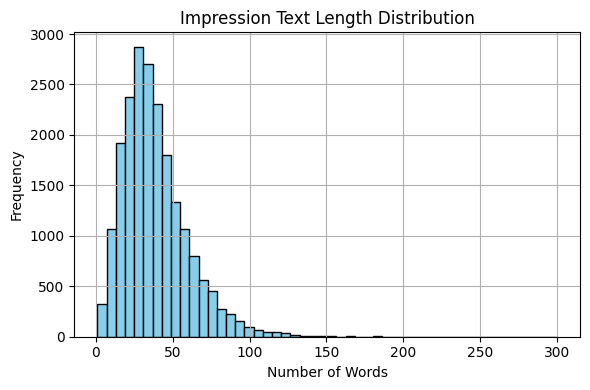

In [ ]:
df["impression_length"] = df["cleaned_impression"].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(6, 4))
plt.hist(df["impression_length"], bins=50, color="skyblue", edgecolor="black")
plt.title("Impression Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
